In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url="../data/processed/sorted_output.csv"
parse_dates=["time"]
ds = pd.read_csv(url, parse_dates=parse_dates)

In [3]:
ds.shape

(6038706, 5)

In [4]:
ds["sensor"].value_counts()

DHT22     1522253
HTU21     1510105
BMP280    1504469
DHT11     1501874
DM280           5
Name: sensor, dtype: int64

In [5]:
ds.sample(10)

,time,sensor,H,P,T
3724077,2018-02-10 09:54:07,BMP280,NaN,1019.27,21.30
4216002,2018-02-16 08:07:15,BMP280,NaN,1024.47,23.08
4109570,2018-02-14 23:20:17,BMP280,NaN,1018.52,22.89
5918677,2018-03-12 02:24:11,DHT22,1.0,NaN,24.50
3053371,2018-02-02 17:28:07,DHT11,35.0,NaN,NaN
3244462,2018-02-04 22:30:11,DHT11,36.0,NaN,18.00
5576049,2018-03-08 04:45:17,HTU21,29.0,NaN,22.30
5523255,2018-03-07 14:13:58,HTU21,26.1,NaN,24.79
1165546,2018-01-10 10:01:12,DHT22,1.0,NaN,24.20
5771686,2018-03-10 10:13:21,DHT22,1.0,NaN,25.70


In [6]:
ds.describe(include="all")

,time,sensor,H,P,T
count,6038706,6038706,4.288839e+06,1.422792e+06,5.711640e+06
unique,5943769,5,NaN,NaN,NaN
top,2018-03-13 11:35:48,DHT22,NaN,NaN,NaN
freq,4,1522253,NaN,NaN,NaN
first,2017-12-19 14:07:18,NaN,NaN,NaN,NaN
last,2018-03-13 11:42:12,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.336465e+01,1.015690e+03,2.201185e+01
std,NaN,NaN,1.617257e+01,1.011069e+01,2.631197e+00
min,NaN,NaN,1.000000e+00,9.856200e+02,1.500000e+01
25%,NaN,NaN,1.000000e+00,1.008670e+03,2.063000e+01


In [7]:
# Analizing only Humidity information
dsh = ds[pd.notnull(ds["H"])]
dsh = dsh[dsh["H"] > 1]
dsh = dsh[dsh["H"]<99.9]
dsh = dsh[dsh["time"]>"2017-12-22"]
dsh = dsh[["time","sensor","H"]]
dsh["time"] = dsh["time"].values.astype('<M8[m]')
dsh = dsh[dsh["sensor"]=="HTU21"]

In [8]:
dsh.shape

(1428193, 3)

In [9]:
dsh["sensor"].value_counts()

HTU21    1428193
Name: sensor, dtype: int64

In [10]:
dsh.tail(10)

,time,sensor,H
6038667,2018-03-13 11:41:00,HTU21,30.9
6038671,2018-03-13 11:41:00,HTU21,30.9
6038675,2018-03-13 11:41:00,HTU21,30.8
6038679,2018-03-13 11:41:00,HTU21,30.9
6038684,2018-03-13 11:41:00,HTU21,30.9
6038688,2018-03-13 11:41:00,HTU21,30.8
6038692,2018-03-13 11:41:00,HTU21,30.8
6038696,2018-03-13 11:42:00,HTU21,30.8
6038700,2018-03-13 11:42:00,HTU21,31.0
6038705,2018-03-13 11:42:00,HTU21,33.6


In [11]:
dsh.describe(include="all")

,time,sensor,H
count,1428193,1428193,1.428193e+06
unique,101243,1,NaN
top,2017-12-22 10:08:00,HTU21,NaN
freq,29,1428193,NaN
first,2017-12-22 08:12:00,NaN,NaN
last,2018-03-13 11:42:00,NaN,NaN
mean,NaN,NaN,3.434112e+01
std,NaN,NaN,4.953964e+00
min,NaN,NaN,1.970000e+01
25%,NaN,NaN,3.040000e+01


In [12]:
dst = ds[pd.notnull(ds["T"])]
dst = dst[["time","sensor","T"]]
dst["time"] = dst["time"].values.astype('<M8[m]')
dst = dst[dst["sensor"]=="DHT22"]

In [13]:
dst.shape

(1440150, 3)

In [14]:
dst["sensor"].value_counts()

DHT22    1440150
Name: sensor, dtype: int64

In [15]:
dst.describe(include="all")

,time,sensor,T
count,1440150,1440150,1.440150e+06
unique,102457,1,NaN
top,2017-12-22 09:37:00,DHT22,NaN
freq,29,1440150,NaN
first,2017-12-19 14:07:00,NaN,NaN
last,2018-03-13 11:42:00,NaN,NaN
mean,NaN,NaN,2.299986e+01
std,NaN,NaN,2.480804e+00
min,NaN,NaN,1.670000e+01
25%,NaN,NaN,2.170000e+01


In [16]:
dsp = ds[pd.notnull(ds["P"])]
dsp = dsp[["time","sensor","P"]]
dsp["time"] = dsp["time"].values.astype('<M8[m]')
dsp = dsp[dsp["sensor"]=="BMP280"]
dsp["P"] = (dsp["P"] - 1000) / 2

In [17]:
dsp.shape

(1422788, 3)

In [18]:
dsp.sample(10)

,time,sensor,P
261243,2017-12-25 07:58:00,BMP280,13.865
5780172,2018-03-10 12:32:00,BMP280,2.330
5981241,2018-03-12 19:44:00,BMP280,7.100
3595727,2018-02-08 22:48:00,BMP280,9.830
3371271,2018-02-06 09:07:00,BMP280,3.930
5860921,2018-03-11 10:33:00,BMP280,0.885
2048746,2018-01-20 18:57:00,BMP280,8.615
4828456,2018-02-27 13:47:00,BMP280,4.190
4969667,2018-03-01 05:01:00,BMP280,-3.065
2246450,2018-01-23 03:46:00,BMP280,12.800


In [19]:
dsp.describe(include='all')

,time,sensor,P
count,1422788,1422788,1.422788e+06
unique,101097,1,NaN
top,2017-12-22 11:18:00,BMP280,NaN
freq,20,1422788,NaN
first,2017-12-22 10:52:00,NaN,NaN
last,2018-03-13 11:42:00,NaN,NaN
mean,NaN,NaN,7.845136e+00
std,NaN,NaN,5.055313e+00
min,NaN,NaN,-7.190000e+00
25%,NaN,NaN,4.335000e+00


In [20]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

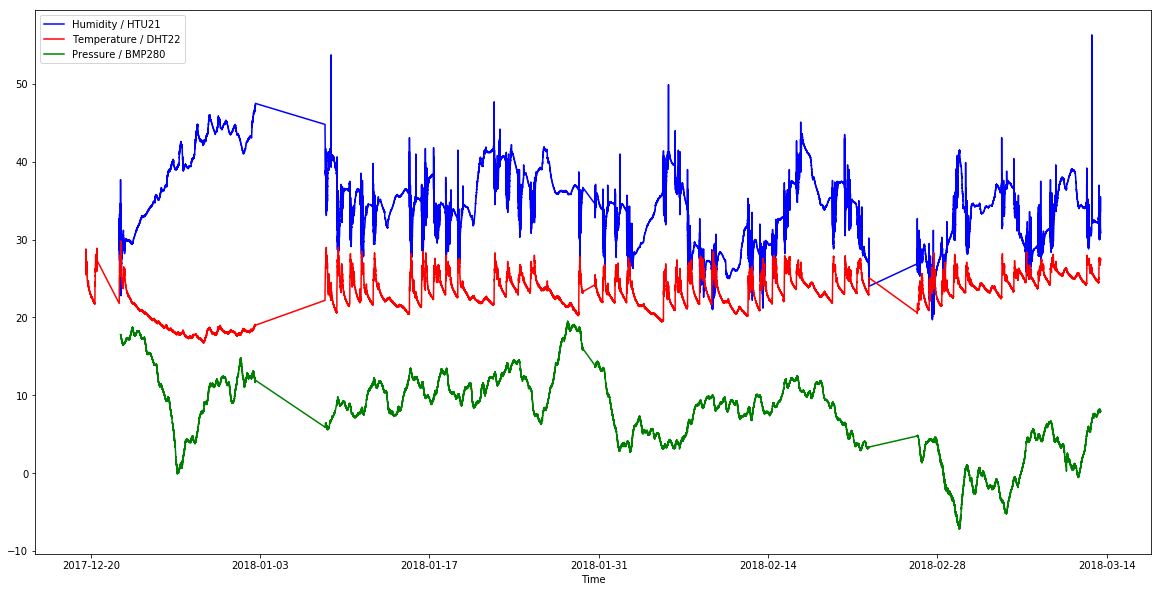

In [21]:
plt.plot(dsh["time"], dsh["H"], "blue", label="Humidity / HTU21")
plt.plot(dst["time"], dst["T"], "red", label="Temperature / DHT22")
plt.plot(dsp["time"], dsp["P"], "green", label="Pressure / BMP280")
plt.xlabel("Time")
plt.ylabel("")
plt.legend()

In [22]:
# Relation between best Humidity, Temperature and Pressure sensors
# Temperatura and Humidity have similar evolution
# Presure evolution doesn't seem related with rest of measures

In [23]:
# Focusing in last 2 weeks
dst2 = dst[dst["time"]>"2018-02-25"]
dst2 = dst2[dst2["time"]<"2018-03-12"]
dsh2 = dsh[dsh["time"]>"2018-02-25"]
dsh2 = dsh2[dsh2["time"]<"2018-03-12"]
dsp2 = dsp[dsp["time"]>"2018-02-25"]
dsp2 = dsp2[dsp2["time"]<"2018-03-12"]

In [24]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

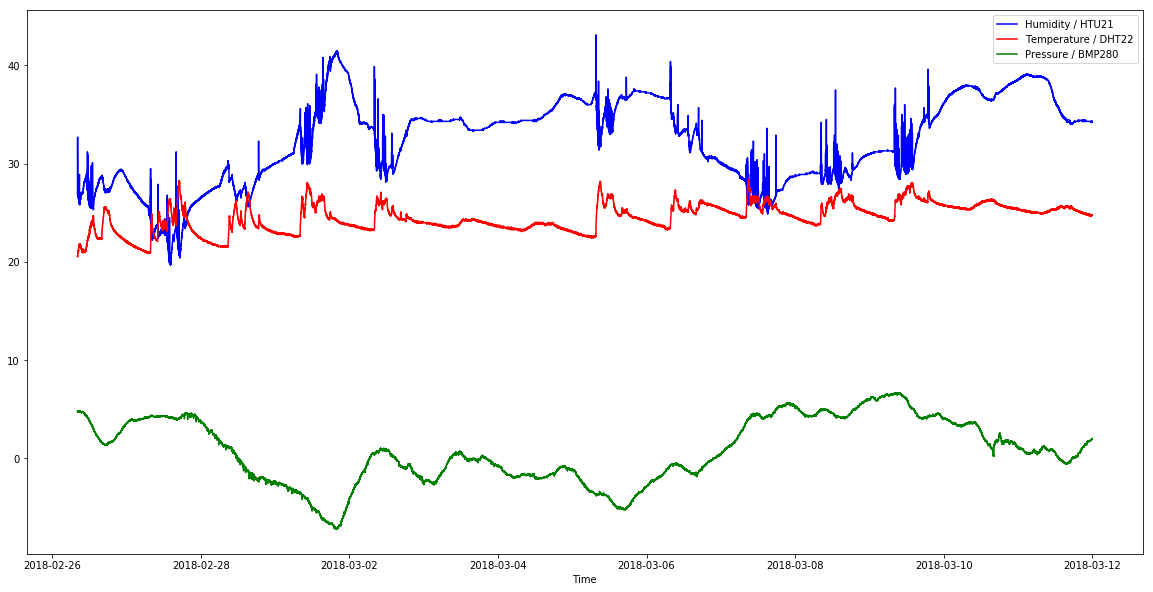

In [25]:
plt.plot(dsh2["time"], dsh2["H"], "blue", label="Humidity / HTU21")
plt.plot(dst2["time"], dst2["T"], "red", label="Temperature / DHT22")
plt.plot(dsp2["time"], dsp2["P"], "green", label="Pressure / BMP280")
plt.xlabel("Time")
plt.ylabel("")
plt.legend()

In [26]:
# Pressure and humidity have inverse relation. There cicles of some days
# In variations intraday temperature and humidity have inverse relation, especialy in daily rise of temperature.